# medical insurance prediction cost

# problem statement
 it is a regression problem and the objective of the project is to predict medical insurance cost of person

# import libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# load the dataset

In [13]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# data analysis

In [14]:
#getting the number of columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
#getting the number of rows and column
data.shape

(1338, 7)

In [17]:
#checking for null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
#checking for duplicates
data.duplicated().sum()

1

In [21]:
#summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
#getting statistical data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# data visualization

In [33]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

Text(0.5, 1.0, 'age distribution')

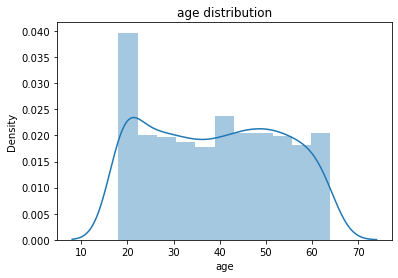

In [34]:
#age distribution
sns.distplot(data["age"])
plt.title("age distribution")

Text(0.5, 1.0, 'BMI distributuion')

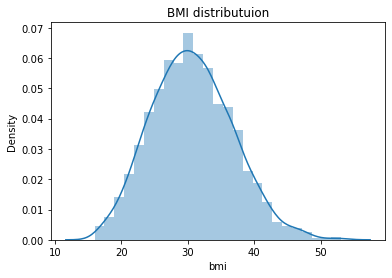

In [35]:
#bmi distribution
sns.distplot(data["bmi"])
plt.title("BMI distributuion")

Text(0.5, 1.0, 'sex distribution')

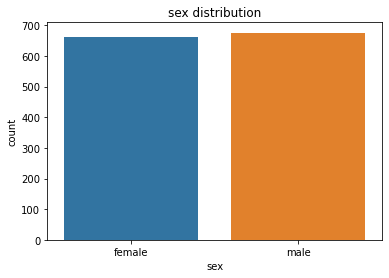

In [36]:
sns.countplot(data["sex"])
plt.title("sex distribution")

Text(0.5, 1.0, 'smoker distribution')

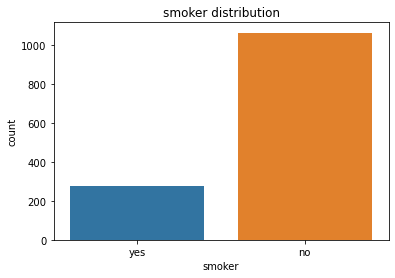

In [37]:
sns.countplot(data["smoker"])
plt.title("smoker distribution")

In [40]:
#value counts
data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'children distribution')

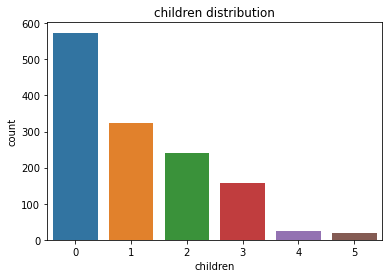

In [39]:
sns.countplot(data["children"])
plt.title("children distribution")

Text(0.5, 1.0, 'region distriution')

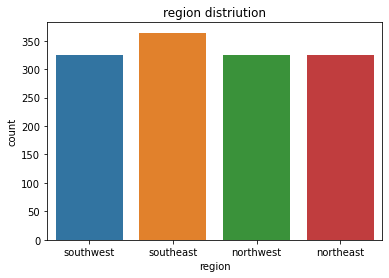

In [41]:
sns.countplot(data["region"])
plt.title("region distriution")

Text(0.5, 1.0, 'distribution of charges')

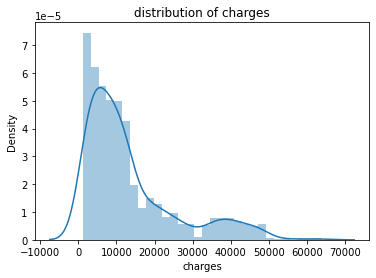

In [42]:
sns.distplot(data["charges"])
plt.title("distribution of charges")

# data preprocessing

In [48]:
x=["sex","smoker","region"]
encode=LabelEncoder()
for columns in x:
    data[columns]=encode.fit_transform(data[columns])

In [49]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# spliting features an the target

In [50]:
x=data.drop(["charges"],axis=1).values
y=data["charges"].values

In [51]:
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


# implementation of least square method in machine learning model

# calculating the coefficient

In [53]:

mean_x=np.mean(x)
mean_y=np.mean(y)
print(mean_x)
print(mean_y)

12.198508345789737
13270.422265141257


# calculating the y intercept(C) and the slope(M)

In [67]:
upper_method=0
lower_method=0
n=len(x)
for i in range(n):
    upper_method += (x[i]-mean_x)* (y[i]-mean_y)
    lower_method +=(x[i]-mean_x)**2
m=upper_method/ lower_method
c=mean_y-(slope_m*mean_x)


# plotting values and regression line

In [95]:
max_x=np.max(x)+10000
min_x=np.max(x)-10000

# calculating the lines values x and y

In [110]:
x=np.linspace(min_x, max_x, 6)
y= c + m * x


# plotting line and the scatter points

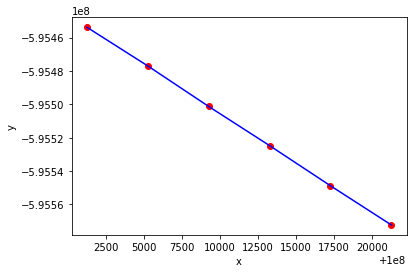

In [104]:
#plotting the line
plt.plot(x,y,color="blue",label="regression line")
#ploting the scater points
plt.scatter(x,y,color="red",label="scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
